# Load Data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [2]:
AFL_data = pd.read_csv("RawData.csv")

In [3]:
AFL_data.head()

,Date,Name,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebounds,Inside 50s,Clearances,Clangers,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG
0,2019-09-28 00:00:00,Zac Williams,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,21.0,11.0,4.0,10.0,0.0,0.0,0.0,5.0,1.0,3.0,3.0,4.0,0.0,0.0,7.0,13.0,0.0,1.0,0.0,0.0,0.0,68
1,2019-09-28 00:00:00,Lachie Whitfield,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,14.0,12.0,3.0,2.0,0.0,0.0,0.0,1.0,5.0,2.0,3.0,3.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0,0.0,0.0,91
2,2019-09-28 00:00:00,Adam Tomlinson,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,17.0,11.0,6.0,6.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,3.0,0.0,1.0,6.0,11.0,0.0,0.0,1.0,0.0,0.0,83
3,2019-09-28 00:00:00,Sam Taylor,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,14.0,6.0,4.0,8.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,2.0,1.0,0.0,6.0,8.0,1.0,0.0,9.0,0.0,0.0,91
4,2019-09-28 00:00:00,Tim Taranto,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,30.0,14.0,5.0,16.0,0.0,0.0,0.0,7.0,3.0,4.0,5.0,4.0,3.0,1.0,15.0,18.0,0.0,0.0,1.0,0.0,0.0,80


In [4]:
LABEL_FIELD_NAME = "Brownlow Votes"

# Data Cleaning

In [5]:
AFL_data[AFL_data.isnull().any(axis=1)]

,Date,Name,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebounds,Inside 50s,Clearances,Clangers,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG


In [6]:
AFL_data[AFL_data.isna().any(axis=1)]

,Date,Name,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebounds,Inside 50s,Clearances,Clangers,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG


In [7]:
AFL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146607 entries, 0 to 146606
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             146607 non-null  object 
 1   Name             146607 non-null  object 
 2   Team             146607 non-null  object 
 3   Season           146607 non-null  float64
 4   Round            146607 non-null  object 
 5   Home Team        146607 non-null  object 
 6   Away Team        146607 non-null  object 
 7   Home Score       146607 non-null  int64  
 8   Away Score       146607 non-null  int64  
 9   Margin           146607 non-null  int64  
 10  Disposals        146607 non-null  float64
 11  Kicks            146607 non-null  float64
 12  Marks            146607 non-null  float64
 13  Handballs        146607 non-null  float64
 14  Goals            146607 non-null  float64
 15  Behinds          146607 non-null  float64
 16  Hitouts          146607 non-null  floa

Dataset does not contain any null or empty data values

# Test - Train Split

Seasons 2003 - 2015: Training + Validation Data

Seasons 2016 - 2019: Test Data

In [8]:
total_size = AFL_data.shape[0]

In [9]:
# Select all rows whose seasons is from 2003 to 2015
AFL_Train = AFL_data.loc[AFL_data['Season'].isin([year for year in range(2003, 2016)])]

In [10]:
# Select all rows whose seasons is from 2016 to 2019
AFL_Test = AFL_data.loc[AFL_data['Season'].isin([year for year in range(2016, 2020)])]

In [11]:
train_size = AFL_Train.shape[0]
test_size = AFL_Test.shape[0]

In [12]:
# Check split for any data loss
assert total_size == (train_size + test_size)

# Feature Engineering - 1

## Feature Engineering for Data Visualization

In [13]:
def check_hometeam(row):
    return 1 if row["Team"] == row["Home Team"] else 0

In [14]:
def get_team_score(row):
    return row["Home Score"] if row["Team"] == row["Home Team"] else row["Away Score"]

In [15]:
def get_team_margin(row):
    return row["Margin"] if row["Team"] == row["Home Team"] else -row["Margin"]

In [16]:
AFL_Train["Is_Home_Team"] = AFL_Train.apply(check_hometeam, axis = 1)

In [17]:
AFL_Train["Team_Score"] = AFL_Train.apply(get_team_score, axis = 1)

In [18]:
AFL_Train["Team_Margin"] = AFL_Train.apply(get_team_margin, axis = 1)

In [19]:
AFL_Train.head()

,Date,Name,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,Disposals,Kicks,Marks,Handballs,Goals,Behinds,Hitouts,Tackles,Rebounds,Inside 50s,Clearances,Clangers,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG,Is_Home_Team,Team_Score,Team_Margin
27412,2015-07-18 00:00:00,Zac Williams,Greater Western Sydney,2015.0,16,Gold Coast,Greater Western Sydney,79,94,-15,20.0,12.0,7.0,8.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,3.0,17.0,0.0,0.0,1.0,0.0,0.0,81,0,94,15
27413,2015-07-18 00:00:00,Lachie Whitfield,Greater Western Sydney,2015.0,16,Gold Coast,Greater Western Sydney,79,94,-15,17.0,13.0,8.0,4.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,2.0,0.0,2.0,2.0,15.0,0.0,0.0,1.0,1.0,0.0,91,0,94,15
27414,2015-07-18 00:00:00,Callan Ward,Greater Western Sydney,2015.0,16,Gold Coast,Greater Western Sydney,79,94,-15,30.0,17.0,8.0,13.0,2.0,2.0,5.0,5.0,1.0,4.0,9.0,4.0,1.0,1.0,15.0,17.0,2.0,2.0,0.0,0.0,1.0,82,0,94,15
27415,2015-07-18 00:00:00,Adam Treloar,Greater Western Sydney,2015.0,16,Gold Coast,Greater Western Sydney,79,94,-15,19.0,12.0,3.0,7.0,0.0,1.0,1.0,5.0,0.0,4.0,2.0,3.0,0.0,1.0,3.0,16.0,0.0,0.0,0.0,3.0,0.0,81,0,94,15
27416,2015-07-18 00:00:00,Adam Tomlinson,Greater Western Sydney,2015.0,16,Gold Coast,Greater Western Sydney,79,94,-15,18.0,13.0,9.0,5.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,5.0,13.0,0.0,0.0,6.0,0.0,0.0,94,0,94,15


# EDA - Exploratory Data Analysis

Examining Class Distribution and any linear dependence with the Brownlow Votes

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Class Distribution

In [21]:
class_distribution = AFL_Train.groupby([LABEL_FIELD_NAME]).size()
print(class_distribution)

Brownlow Votes
0.0    103017
1.0      2386
2.0      2386
3.0      2386
dtype: int64


In [22]:
class_proportions = {cls: class_distribution.loc[cls] for cls in range(4)}

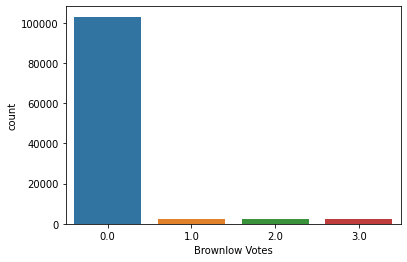

In [23]:
sns.countplot(x = LABEL_FIELD_NAME, data = AFL_Train)

In [24]:
class_proportions

{0: 103017, 1: 2386, 2: 2386, 3: 2386}

## Brownlow Votes vs Team Score

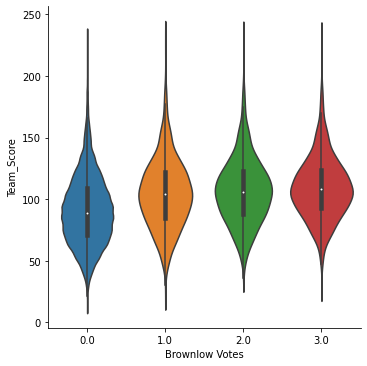

In [25]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Team_Score", data = AFL_Train, kind="violin")

Inference: The Team Score seems important in identifying Brownlow Votes 0. Lower Team Score is generally associated with Brownlow Votes of 0.

## Brownlow Votes vs Team Margin

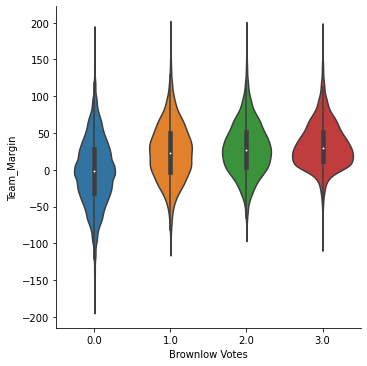

In [26]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Team_Margin", data = AFL_Train, kind="violin")

Inference: The Team Margin (calculated as player's team score - opponent's team score) has a significant contribution in identifying Brownlow Votes 0. Lower Team Margin is generally associated with Brownlow Votes of 0. While not so significant in classifing between Brownlow Votes 1, 2 or 3.

## Brownlow Votes vs Disposals

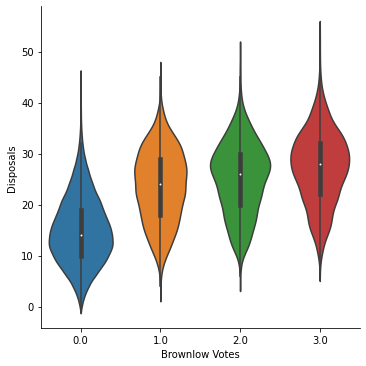

In [27]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Disposals", data = AFL_Train, kind="violin")

Inference: The Disposals seems important in identifying each of the Brownlow Votes. Trend is: Higher the Disposals value, greater is the Brownlow Votes.

## Brownlow Votes vs Kicks

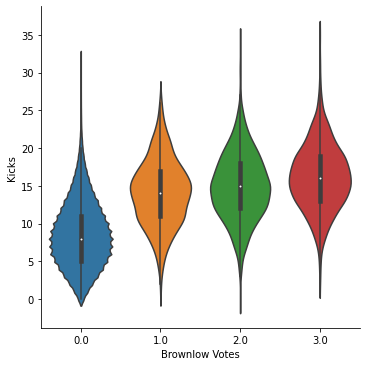

In [28]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Kicks", data = AFL_Train, kind="violin")

Inference: The Kicks has a mild positive correlation in identifying the Brownlow Votes 1, 2 and 3. Kicks with lower values can be associated with Brownlow votes 0

## Brownlow Votes vs Marks

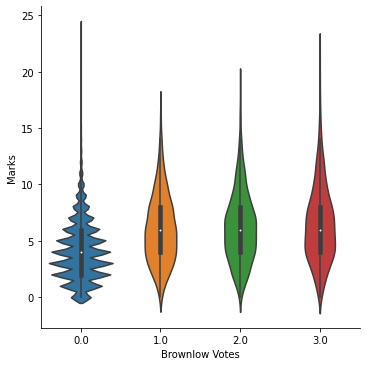

In [29]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Marks", data = AFL_Train, kind="violin")

Inference: No visibly significant association with Marks. Lower Marks are more densely distributed for Brownlow Vote 0

## Brownlow Votes vs Handballs

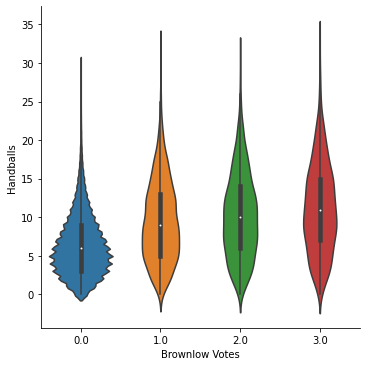

In [30]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Handballs", data = AFL_Train, kind="violin")

Inference: Similar to Marks, Handballs show no visibly significant association with Marks. Lower Handballs count are more densely distributed for Brownlow Vote 0

## Brownlow Votes vs Goals

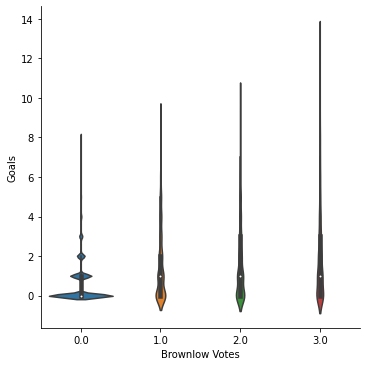

In [31]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Goals", data = AFL_Train, kind="violin")

Inference: Goal count do not have any significant association for lower values. But beyond a threshold they seem to show positive association with Brownlow votes

## Brownlow Votes vs Behinds

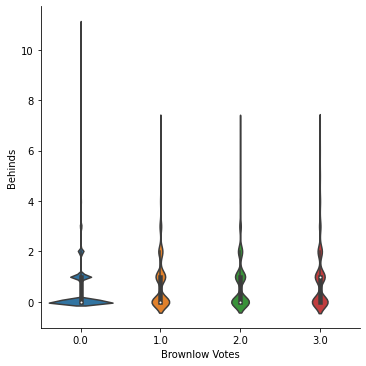

In [32]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Behinds", data = AFL_Train, kind="violin")

Inference: No visible evidence to show any association of Behinds with Brownlow votes


## Brownlow Votes vs Hitouts

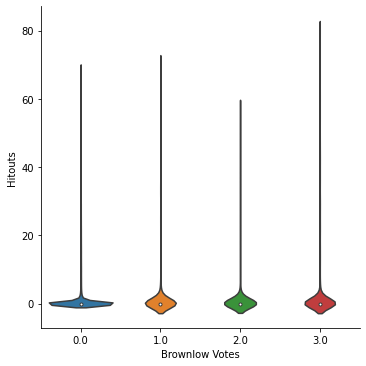

In [33]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Hitouts", data = AFL_Train, kind="violin")

Inference: No visible evidence to show any linear dependency of Hitouts with Brownlow votes


## Brownlow Votes vs Tackles

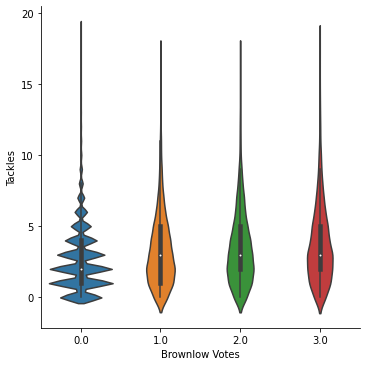

In [34]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Tackles", data = AFL_Train, kind="violin")

Inference: No visible evidence to show any linear dependency of Tackles with Brownlow votes


## Brownlow Votes vs Rebounds

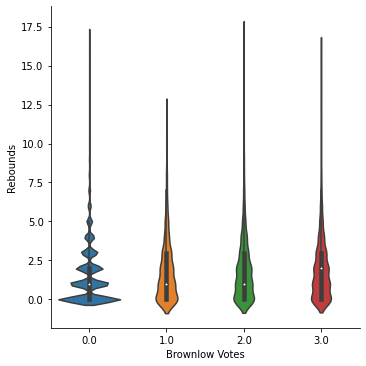

In [35]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Rebounds", data = AFL_Train, kind="violin")

Inference: No visible evidence to show any linear dependency of Tackles with Brownlow votes 0, 1 and 2. However, there is a small upward shift in Rebounds for Brownlow vote 3


## Brownlow Votes vs Inside 50s

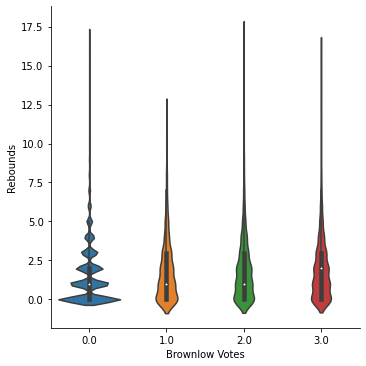

In [36]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Rebounds", data = AFL_Train, kind="violin")

Inference: Similar to Rebounds, Inside 50s show no visible evidence to show any linear dependency of Tackles with Brownlow votes 0, 1 and 2. However, there is a small upward shift in Rebounds for Brownlow vote 3


## Brownlow Vote vs Clearances

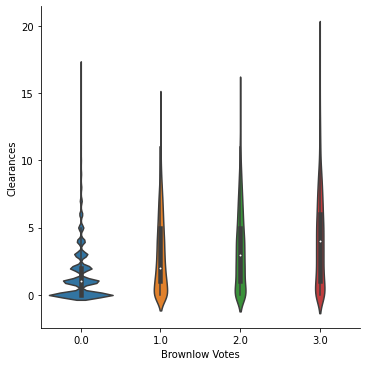

In [37]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Clearances", data = AFL_Train, kind="violin")

Inference: There is a mild positive correlation for Brownlow votes with Clearances

## Brownlow Votes vs Clangers

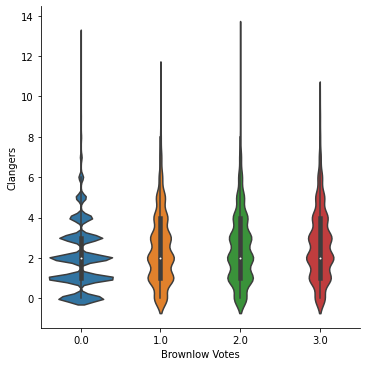

In [38]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Clangers", data = AFL_Train, kind="violin")

Inference: No significant visible association for Clangers with Brownlow votes

## Brownlow Votes vs Frees For

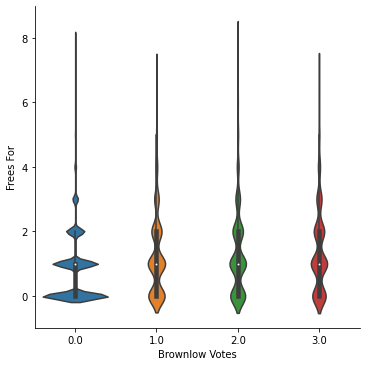

In [39]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Frees For", data = AFL_Train, kind="violin")

Inference: No significant visible association for "Frees For" with Brownlow votes

## Brownlow Votes vs Frees Against

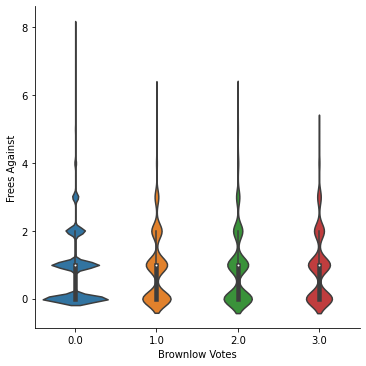

In [40]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Frees Against", data = AFL_Train, kind="violin")

Inference: Similar to "Frees For", "Frees Against" show no significant association with Brownlow votes

## Brownlow Votes vs Contested Pos

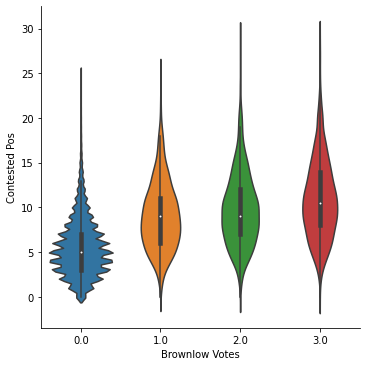

In [41]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Contested Pos", data = AFL_Train, kind="violin")

Inference: "Contested Pos" shows a mild positive correlation with Brownlow Votes

## Brownlow Votes vs Uncontested Pos

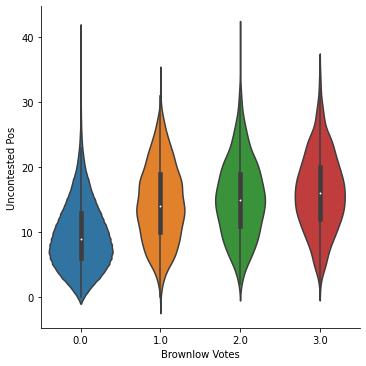

In [42]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Uncontested Pos", data = AFL_Train, kind="violin")

Inference: "Uncontested Pos" indicates, a lower value associated with Brownlow vote 0, for Brownlow votes 1, 2 and 3, there is not distinct attribution from "Uncontested Pos"

## Brownlow Votes vs Contested Marks

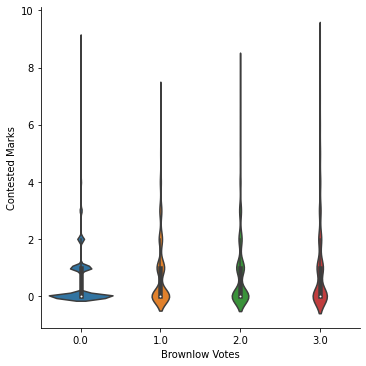

In [43]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Contested Marks", data = AFL_Train, kind="violin")

Inference: No distinct patterns visible in attributing "Contested Marks" towards Brownlow Votes

## Brownlow Votes vs Marks Inside 50

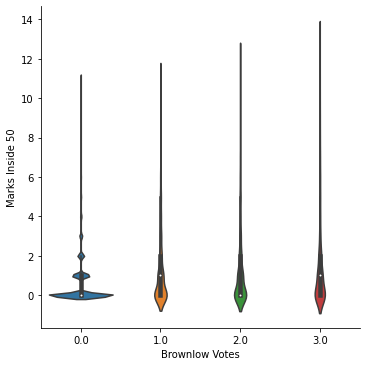

In [44]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Marks Inside 50", data = AFL_Train, kind="violin")

Inference: "Marks Inside 50" show no significant relation with Brownlow Votes

## Brownlow Votes vs One Percenters

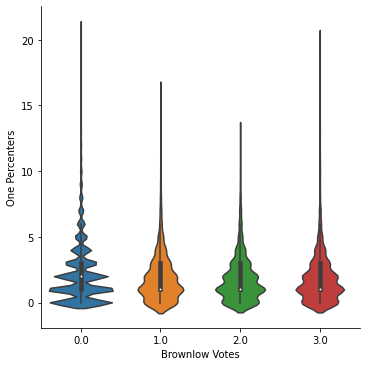

In [45]:
sns.catplot(x = LABEL_FIELD_NAME, y = "One Percenters", data = AFL_Train, kind="violin")

Inference: No visible evidence of "One Percenters" being associated with Brownlow Votes

## Brownlow Votes vs Goal Assists

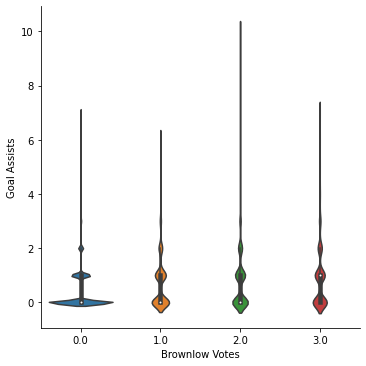

In [46]:
sns.catplot(x = LABEL_FIELD_NAME, y = "Goal Assists", data = AFL_Train, kind="violin")

Inference: No strong visible evidence to attribute the Brownlow Votes

## Brownlow Votes vs Time On Ground (TOG)

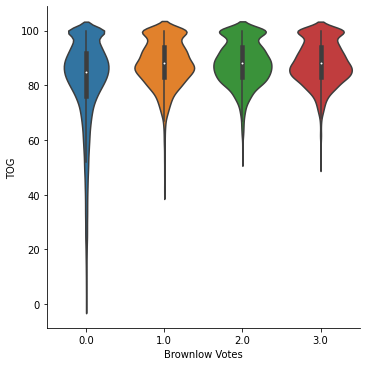

In [47]:
sns.catplot(x = LABEL_FIELD_NAME, y = "TOG", data = AFL_Train, kind="violin")

Inference: Time On Ground with lower values (< 50) shows strong evidence of being associated with 0 Brownlow Vote.

## Brownlow Votes vs Home Team Attribution

In [48]:
Home_Team_Association = pd.crosstab(AFL_Train[LABEL_FIELD_NAME], AFL_Train['Is_Home_Team'])
print(Home_Team_Association)


Is_Home_Team        0      1
Brownlow Votes              
0.0             51945  51072
1.0              1054   1332
2.0              1041   1345
3.0              1026   1360


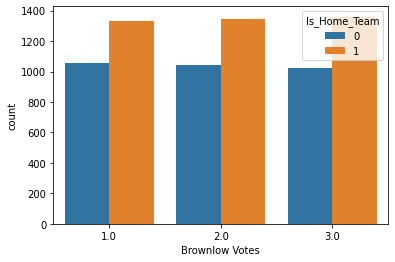

In [49]:
# Filtering out Bronwlow Votes 1, 2, 3 (since Brownlow Vote 0  has high volume - the patterns for 1, 2 or 3 wont be clear)
AFL_Brownlow_Vote_Winners = AFL_Train.loc[AFL_Train[LABEL_FIELD_NAME].isin([1, 2, 3])]
sns.countplot(x = LABEL_FIELD_NAME, hue = "Is_Home_Team", data = AFL_Brownlow_Vote_Winners)

Inference: For each of Brownlow Votes 1, 2 and 3, the Home Team Players have won the Brownlow Vote about 60% of the time.

# Feature Engineering - 2

## Feature Encoding

In [50]:
rounds_order = [str(round_num) for round_num in range(1, 25)]
rounds_order.extend(["EF", "QF", "SF", "PF", "GF"])
rounds_order_map = {round: (round_idx + 1) for round_idx, round in enumerate(rounds_order)}

def encode_round_order(row):
    return rounds_order_map[row["Round"]]

In [51]:
AFL_Train["Round_Cat"] = AFL_Train.apply(encode_round_order, axis = 1)

# Important Features (from EDA)

Based on the EDA, the following features are considered:



1. Team_Margin
2. Disposals
3. Kicks
4. Marks
5. Handballs
6. Goals
7. Behinds
8. Rebounds
9. Inside 50s
10. Contested Pos
11. Uncontested Pos
12. Time On Ground
13. Is_Home_Team
14. Team_Score

The Round Number will not have any direct relation with Brownlow Votes prediction. Since each match ends with 3 players being given Brownlow Votes 1, 2 and 3 respectively. However, the might have an interaction effect with the other predictors. 

In [52]:
full_features = [
            "Team_Margin",
            "Disposals",
            "Kicks",
            "Marks",
            "Handballs",
            "Goals",
            "Behinds",
            "Hitouts",
            "Tackles",
            "Rebounds",
            "Inside 50s",
            "Clearances",
            "Clangers",
            "Frees For",
            "Frees Against",
            "Contested Pos",
            "Uncontested Pos",
            "Marks Inside 50",
            "One Percenters",
            "Goal Assists",
            "TOG",
            "Is_Home_Team",
            "Round_Cat",
            "Team_Score"
        ]

# Brownlow Votes Classifier

Setting up a Strafied 10-Fold for Cross-Validation Evaluation

Note: Using StratifiesCV to retain the class imbalance across each fold

Using F1-Score (with macro average) as an evaluation metric to account for the class imbalance

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, roc_auc_score

RANDOM_STATE = 30
NUMBER_FOLDS = 5

cv = StratifiedKFold(n_splits = NUMBER_FOLDS, shuffle = True, random_state = RANDOM_STATE)

f1_scoring = make_scorer(f1_score, average = 'macro')


In [54]:
def print_grid_clf_summary(grid_cv_clf, grid_params):
    print("Best Score: {0}".format(grid_cv_clf.best_score_))
    print("Best Parameters:")
    for param_name in sorted(grid_params.keys()):
        print("\t{0}: {1}".format(param_name ,grid_cv_clf.best_params_[param_name]))
    return grid_cv_clf.best_estimator_

## Random Forest Classifier

Random Forest can capture some complex interactions among the predictors and is robust to over-fitting

NOTE: Using only a few parameters combinations to save CV time

In [55]:
def plot_feature_importance(model, feaures_list):
    feat_importances = pd.Series(model.feature_importances_, index = feaures_list)
    feat_importances.nlargest(len(feaures_list)).plot(kind='barh')

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_params_grid = {"max_depth": [10, 20, 50],
                  "criterion": ["gini"],
                  "n_estimators" : [100, 200, 300]
        }

rf_clf = RandomForestClassifier(n_jobs = -1)

rf_grid_clf = GridSearchCV(
    estimator = rf_clf, 
    param_grid = rf_params_grid, 
    scoring = f1_scoring,
    cv = cv, 
    verbose = 4)

In [57]:
rf_grid_clf.fit(AFL_Train[full_features], AFL_Train[LABEL_FIELD_NAME])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.328, total=   8.4s
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.326, total=   7.0s
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.331, total=   7.1s
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.330, total=   7.0s
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.322, total=   7.1s
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.325, total=  13.8s
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.331, total=  13.9s
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.330, total=  13.8s
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.331, total=  14.0s
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.319, total=  14.2s
[CV] cr

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 15.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [58]:
best_rf_clf = print_grid_clf_summary(rf_grid_clf, rf_params_grid)

Best Score: 0.3476742316967868
Best Parameters:
	criterion: gini
	max_depth: 20
	n_estimators: 100


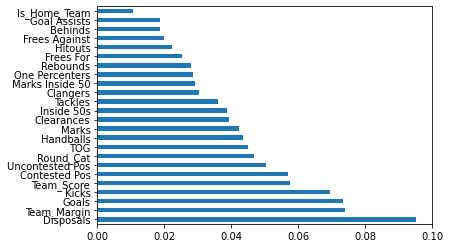

In [59]:
plot_feature_importance(best_rf_clf, full_features)

### Random Forest with Weighted Class

In [60]:
total_votes = sum([vote for _, vote in class_proportions.items()])
weights = {vote_key: (1 - vote/total_votes) / 3 for vote_key, vote in class_proportions.items()}
print(weights)

{0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}


In [61]:
sum([weight for _, weight in weights.items()])

1.0

In [62]:
rf_wt_params_grid = {"max_depth": [10, 20, 50],
                  "criterion": ["gini"],
                  "n_estimators" : [100, 200, 300],
                  "class_weight": [weights]
                  }

rf_wt_clf = RandomForestClassifier(RandomForestClassifier(n_jobs = -1))

rf_wt_grid_clf = GridSearchCV(
    estimator = rf_clf, 
    param_grid = rf_wt_params_grid, 
    scoring = f1_scoring,
    cv = cv, 
    verbose = 4)

In [63]:
rf_wt_grid_clf.fit(AFL_Train[full_features], AFL_Train[LABEL_FIELD_NAME])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100, score=0.402, total=   7.1s
[CV] class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV]  class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100, score=0.411, total=   7.1s
[CV] class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


[CV]  class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100, score=0.396, total=   7.2s
[CV] class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.4s remaining:    0.0s


[CV]  class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100, score=0.409, total=   7.2s
[CV] class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100 
[CV]  class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=100, score=0.405, total=   7.1s
[CV] class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=200 
[CV]  class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, criterion=gini, max_depth=10, n_estimators=200, score=0.404, total=  14.4s
[CV] class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 14.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min...
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_wei

In [64]:
best_wt_rf_clf = print_grid_clf_summary(rf_wt_grid_clf, rf_wt_params_grid)

Best Score: 0.4086420545946708
Best Parameters:
	class_weight: {0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}
	criterion: gini
	max_depth: 10
	n_estimators: 200


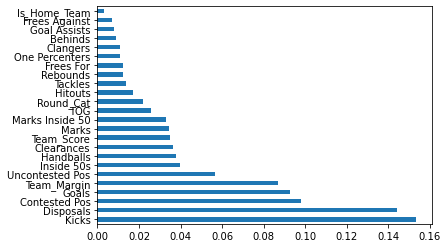

In [65]:
plot_feature_importance(best_wt_rf_clf, full_features)

1. Team_Margin - 4
2. Disposals - 2
3. Kicks - 1
4. Marks
5. Handballs 
6. Goals - 5
7. Behinds
8. Rebounds
9. Inside 50s
10. Contested Pos - 3
11. Uncontested Pos - 6
12. Time On Ground
13. Is_Home_Team
14. Team_Score

The top 6 most significant features used in the classification by the Random Forest model, has used the features from the list obtained by performing visual EDA. Therefore, further modelling can be done by using only these shortlisted features and measure performance.

## Logistic Regression (Class Weighted)

Using a weighted class method since we have observed that class weights give better performance due the inherent nature of our dataset which has a significantly higher Brownlow Vote 0 players

The Logistic Regression is set to use the L1 Regularizer since it can perform feature selection by zeroing out insignificant features. Since we are extrapolating the feature space to higher degree with degreee 2, this would help train a parinomious model.

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(AFL_Train[full_features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
scaled_train = scaler.transform(AFL_Train[full_features])

Creating Polynomial features with degree 2 and interaction effect included

In [75]:
from sklearn import preprocessing

pf = preprocessing.PolynomialFeatures(
    degree=2,
    interaction_only = False,
    include_bias = True)

pf.fit(scaled_train)


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [76]:
AFL_poly_feats = pf.transform(scaled_train)

In [79]:
from sklearn.linear_model import LogisticRegression

lr_params_grid = {
    "C": [1,10,100],
    "class_weight": [weights]
    }

lr_clf = LogisticRegression(penalty ="l1", multi_class = "ovr", solver = "saga")

lr_grid_clf = GridSearchCV(
    estimator = lr_clf, 
    param_grid = lr_params_grid, 
    scoring = f1_scoring,
    cv = cv, 
    verbose = 4)

In [80]:
lr_grid_clf.fit(AFL_poly_feats, AFL_Train[LABEL_FIELD_NAME])

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s


[CV]  C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.408, total= 3.5min
[CV] C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.9min remaining:    0.0s


[CV]  C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.404, total= 3.5min
[CV] C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.4min remaining:    0.0s


[CV]  C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.399, total= 3.5min
[CV] C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.404, total= 3.5min
[CV] C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.410, total= 3.5min
[CV] C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.411, total= 3.2min
[CV] C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.404, total= 3.3min
[CV] C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.398, total= 3.2min
[CV] C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.405, total= 3.2min
[CV] C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.410, total= 3.3min
[CV] C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.409, total= 3.1min
[CV] C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.405, total= 3.1min
[CV] C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.399, total= 3.1min
[CV] C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.404, total= 3.2min
[CV] C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114} 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 49.3min finished


[CV]  C=100, class_weight={0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}, score=0.410, total= 3.1min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100],
                         'class_weight': [{0: 0.02165645563875651,
                                           1: 0.32611451478708114,
                                           2: 0.32611451478708114,
                                       

In [81]:
best_lr_clf = print_grid_clf_summary(lr_grid_clf, lr_params_grid)

Best Score: 0.4055059423637036
Best Parameters:
	C: 100
	class_weight: {0: 0.02165645563875651, 1: 0.32611451478708114, 2: 0.32611451478708114, 3: 0.32611451478708114}


# Test Evaluation

Evaluation Metric:

> Macro averaged F1-Score to capture multi class prediction with class imbalance

> Macro averaged One-vs-One ROC AUC score (which uses the predicted probabilities) -  To get an insight into correctness of predicted probabilites



In [82]:
def feature_extraction(data):
    data["Is_Home_Team"] = data.apply(check_hometeam, axis = 1)
    data["Team_Score"] = data.apply(get_team_score, axis = 1)
    data["Team_Margin"] = data.apply(get_team_margin, axis = 1)
    data["Round_Cat"] = data.apply(encode_round_order, axis = 1)

    return data

In [83]:
def raw_transformer(data):
    return data

def scale_poly_transformer(data):
    scaled_data = scaler.transform(data)
    return pf.transform(scaled_data)

In [90]:
def predict(data, evauation_grid_cv_models, predictors_list):
    
    raw_test_data = feature_extraction(data)
    raw_test_data = raw_test_data[predictors_list]
    true_labels = data[LABEL_FIELD_NAME]
    performance_summary = {}

    for model_label, (grid_cv_clf, data_transformer) in evauation_grid_cv_models.items():
        best_model = grid_cv_clf.best_estimator_
        test_data = data_transformer(raw_test_data)
        
        test_predictions = best_model.predict(test_data)
        test_prediction_probs = best_model.predict_proba(test_data)

        f1_score_val = f1_score(true_labels, test_predictions, average='macro')
        roc_auc_score_val = roc_auc_score(true_labels, test_prediction_probs, multi_class='ovo', average = 'macro')
            
        print("Model - {0} \n\t CV-Score - {1} \n\t Test F1-Score: {2}, Test ROC AUC Score: {3}".format(
            model_label,
            grid_cv_clf.best_score_,
            f1_score_val, roc_auc_score_val))
        
        print("\n===========================================================================================================\n")
        
        performance_summary[model_label] = {
            "CV-Score": grid_cv_clf.best_score_,
            "Test F1-Score": f1_score_val,
            "Test ROC AUC Score": roc_auc_score_val
            }
        
    return performance_summary

In [91]:
models = {
    "Random Forest without class weights": (rf_grid_clf, raw_transformer),
    "Random Forest using class weights": (rf_wt_grid_clf, raw_transformer),
    "Logistic Regression using class weights": (lr_grid_clf, scale_poly_transformer)
    }

In [92]:
predict(AFL_Test, models, full_features)

Model - Random Forest without class weights 
	 CV-Score - 0.3476742316967868 
	 Test F1-Score: 0.36037104981653056, Test ROC AUC Score: 0.7456753006242111


Model - Random Forest using class weights 
	 CV-Score - 0.4086420545946708 
	 Test F1-Score: 0.40111241972992173, Test ROC AUC Score: 0.7755825599205313


Model - Logistic Regression using class weights 
	 CV-Score - 0.4055059423637036 
	 Test F1-Score: 0.40646259384914907, Test ROC AUC Score: 0.7787685244022294




{'Logistic Regression using class weights': {'CV-Score': 0.4055059423637036,
  'Test F1-Score': 0.40646259384914907,
  'Test ROC AUC Score': 0.7787685244022294},
 'Random Forest using class weights': {'CV-Score': 0.4086420545946708,
  'Test F1-Score': 0.40111241972992173,
  'Test ROC AUC Score': 0.7755825599205313},
 'Random Forest without class weights': {'CV-Score': 0.3476742316967868,
  'Test F1-Score': 0.36037104981653056,
  'Test ROC AUC Score': 0.7456753006242111}}

# Summary

The classifier that uses class weights to account for the data imbalance work better in general. The ROC score indicates that prediction probabilities are more reliable and better thresholding needs to be tuned to make actual class predictions.



---


Further improvement can be done by:
Normalizing the each player's statistics grouped over a particular game.
E.g. Match 1 played between "Richmond" and "Greater Sydney Area", we can account for all the goals scored in that match and scale each player's goal statistic by 1 / total goals in match. Similar operation can be performed for every other attribute.

The intuition behind the approach is, certain matches can be high scoring and many players may score relatively higher than certain low scoring matches. But scaling the statistics to account for a match would remove this bias.

In order to predict based on this data modification, the complete records of all players involved in the match have to be provided to the model. Only then can the appropriate scaling be performed before predicting.